In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from main import X_test, y_train, y_test, X_train, df_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25,Male,United States,No,Yes,Yes,Sometimes,26-100,No,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


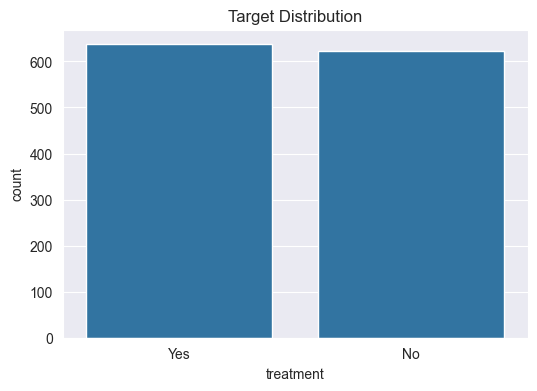

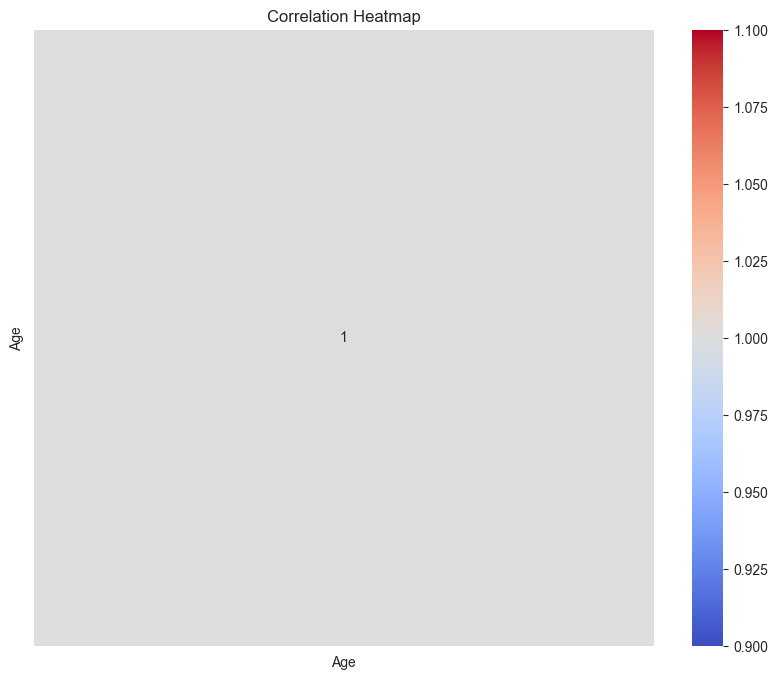

In [23]:
#Load dataset
df = pd.read_csv("data/survey.csv")
df = df.drop(columns=['comments','state','Timestamp'], errors='ignore')

print(df.info())
print(df.describe())
display(df.head())
display(df.tail())


# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='treatment')
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Load trained model
scaler = pickle.load(open('models/scaler.pkl', 'rb'))
model = pickle.load(open('models/model.pkl', 'rb'))

#Encode and clean data
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = le.fit_transform(df[col])

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df.drop(columns = 'treatment')
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# model = pickle.load(open('models/model.pkl', 'rb'))
y_pred = model.predict(X_test_scaled)

In [24]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,10,45,2,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,15,45,2,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,19,7,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,19,44,2,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,19,45,2,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,37,44,0,0,1,4,2,0,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,19,45,0,1,1,1,2,1,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,37,45,0,1,1,3,5,0,1,...,0,1,2,2,0,0,1,1,1,0
1257,46,31,45,0,0,0,4,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1259 non-null   int64
 1   Gender                     1259 non-null   int64
 2   Country                    1259 non-null   int64
 3   self_employed              1259 non-null   int64
 4   family_history             1259 non-null   int64
 5   treatment                  1259 non-null   int64
 6   work_interfere             1259 non-null   int64
 7   no_employees               1259 non-null   int64
 8   remote_work                1259 non-null   int64
 9   tech_company               1259 non-null   int64
 10  benefits                   1259 non-null   int64
 11  care_options               1259 non-null   int64
 12  wellness_program           1259 non-null   int64
 13  seek_help                  1259 non-null   int64
 14  anonymity               

In [26]:
df.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,7.942815e+07,21.746624,37.792693,0.144559,0.390786,0.505957,2.335981,2.783161,0.298650,0.818904,...,0.647339,1.410643,0.853058,0.831612,0.97220,1.097697,0.870532,0.718030,0.814932,0.146148
std,2.818299e+09,9.152314,13.320224,0.390355,0.488121,0.500163,1.373980,1.740247,0.457848,0.385251,...,0.908106,1.508507,0.767905,0.486954,0.62029,0.844407,0.427490,0.723718,0.834414,0.353395
min,-1.726000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+01,19.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.100000e+01,19.000000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.600000e+01,31.000000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000e+11,46.000000,47.000000,2.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000


In [27]:
df.head()
df.tail()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,37,44,0,0,1,4,2,0,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,19,45,0,1,1,1,2,1,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,37,45,0,1,1,3,5,0,1,...,0,1,2,2,0,0,1,1,1,0
1257,46,31,45,0,0,0,4,1,1,1,...,0,0,2,1,0,0,1,1,1,0
1258,25,19,45,0,1,1,3,2,0,0,...,2,0,0,1,1,0,1,1,0,0


<Axes: xlabel='treatment', ylabel='count'>

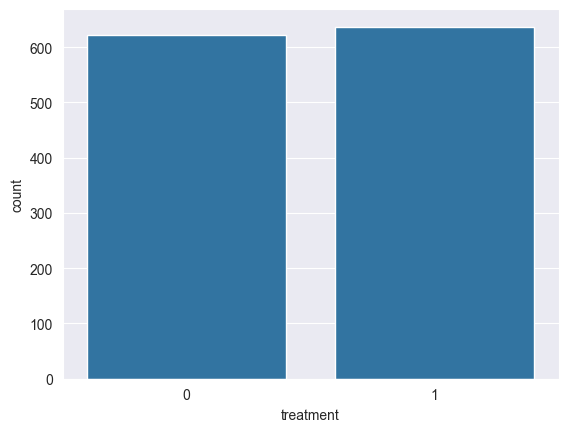

In [28]:
sns.countplot(data=df, x='treatment')

<Axes: >

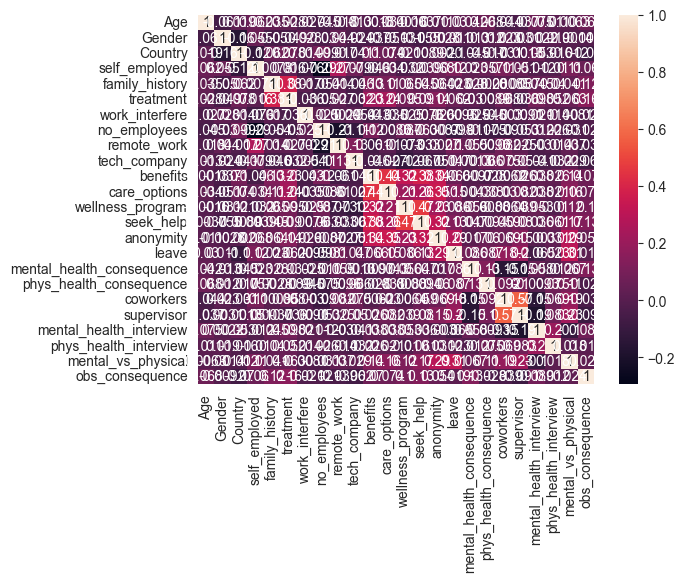

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Confusion Matrix

C:\Users\HP\PycharmProjects\PythonProject\mental_health_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


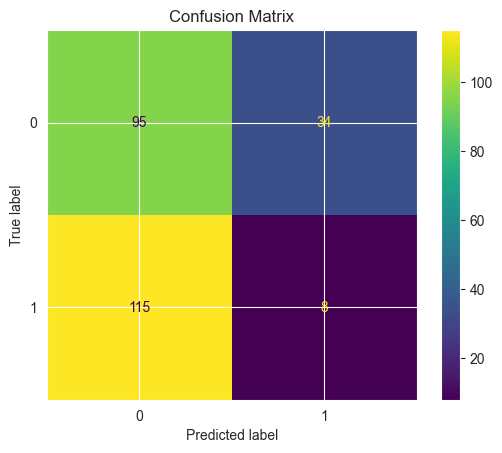

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Classification Report as Table

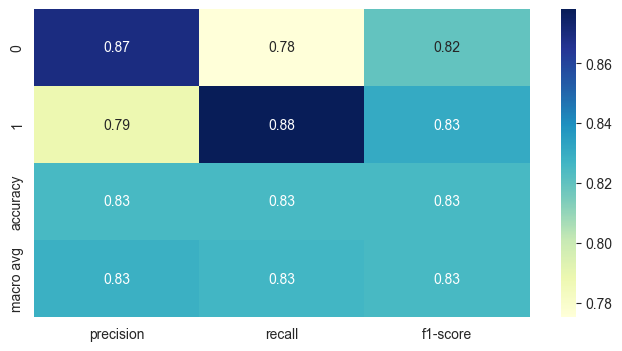

In [31]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1,:-1], annot=True, cmap="YlGnBu")
plt.show()

# ROC Curve

C:\Users\HP\PycharmProjects\PythonProject\mental_health_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


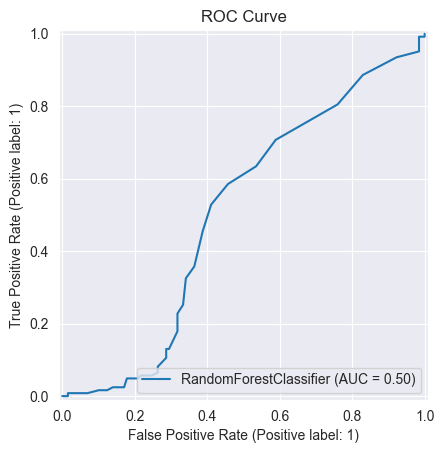

In [32]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Compare All Models (F1-score / ROC-AUC Bar Plot)

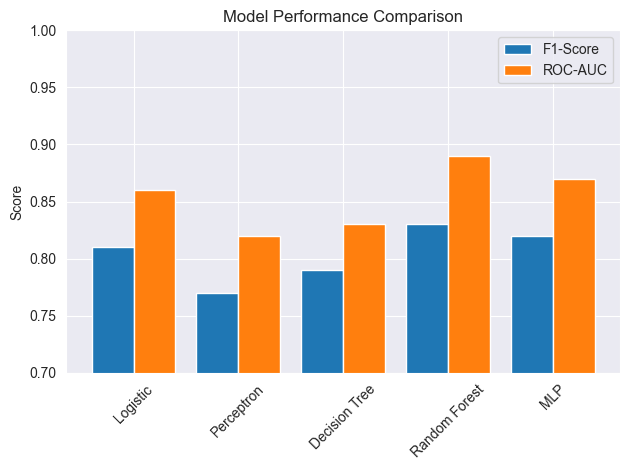

In [33]:
models = ["Logistic", "Perceptron", "Decision Tree", "Random Forest", "MLP"]
f1_scores = [0.81, 0.77, 0.79, 0.83, 0.82]
roc_auc =    [0.86, 0.82, 0.83, 0.89, 0.87]

x = range(len(models))
plt.bar(x, f1_scores, width=0.4, label="F1-Score", align='center')
plt.bar([i + 0.4 for i in x], roc_auc, width=0.4, label="ROC-AUC", align='center')
plt.xticks([i + 0.2 for i in x], models, rotation=45)
plt.ylim(0.7, 1.0)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()